# LSA
### Reading Input from the file

In [2]:
import os
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import scipy as sc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.spatial.distance import cosine as cs
from scipy.stats import spearmanr as spc
from scipy.stats import pearsonr as pec

from nltk.stem import PorterStemmer, WordNetLemmatizer
 
stemmer = PorterStemmer()

path = '/home/sp/NLP_PA1/20_newsgroups/'
dirList = os.listdir(path)

In [5]:
dirList[0]

'sci.crypt'

In [6]:
listData = []
stpWrds = set(stopwords.words("english"))
print("Stop Words", len(stpWrds))
for dn in dirList:
    pn = path + dn + '/'
    dl = os.listdir(pn)
    for fn in dl:
        f = open(pn+fn,'r',encoding="latin-1")
        doc = f.read()
        clear_doc = re.sub('[^a-zA-Z]',' ',doc)
        lower_doc = clear_doc.lower()
        tokken = lower_doc.split()
        tokken = [w for w in tokken if not w in stpWrds]
        strL = " ".join(tokken)
        listData.append(strL)


Stop Words 179


In [64]:
len(listData)

19997

In [24]:
#Getting Term Document Matrix    
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 100000) 

train_data_features = vectorizer.fit_transform(listData)
dtm = train_data_features
vocab = vectorizer.get_feature_names()


'''

norm : ‘l1’, ‘l2’ or None, optional

Norm used to normalize term vectors. None for no normalization.

use_idf : boolean, default=True

Enable inverse-document-frequency reweighting.

smooth_idf : boolean, default=True

Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.

sublinear_tf : boolean, default=False

Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).

'''


tfidfGen = TfidfTransformer(norm='l2',use_idf=False, smooth_idf=False, sublinear_tf=False)

dtm_tf_idf = tfidfGen.fit_transform(dtm)

vocabDisc = {}
for i in range(len(vocab)):
    vocabDisc[vocab[i]] = i
len(vocab)

100000

In [25]:
dtm = None

'''

n_components : int, default = 2

Desired dimensionality of output data. Must be strictly less than the number of features. 
The default value is useful for visualisation. For LSA, a value of 100 is recommended.

algorithm : string, default = “randomized”

SVD solver to use. Either “arpack” for the ARPACK wrapper in SciPy (scipy.sparse.linalg.svds), or “randomized” for the randomized algorithm due to Halko (2009).

n_iter : int, optional (default 5)

Number of iterations for randomized SVD solver. 
Not used by ARPACK. The default is larger than the default in randomized_svd to handle sparse matrices that may have large slowly decaying spectrum.

random_state : int, RandomState instance or None, optional, default = None

If int, random_state is the seed used by the random number generator;
If RandomState instance, random_state is the random number generator;
If None, the random number generator is the RandomState instance used by np.random.

tol : float, optional

Tolerance for ARPACK. 0 means machine precision. Ignored by randomized SVD solver.

'''

In [28]:

topcol = list(range(330,550))
ll = len(topcol)
tdm_tf_idf = dtm_tf_idf.T
svd = TruncatedSVD(n_components=max(topcol),algorithm="arpack",n_iter=100)
tdm_new = svd.fit_transform(tdm_tf_idf)

In [31]:
tt = 0
for topK in topcol:
    wordSimData = pd.read_csv('/home/sp/NLP_PA1/20news.csv')
    w1list = wordSimData.values[:,0]
    w1list = " ".join(x for x in w1list)
    w1list = (w1list.lower()).split()
    w2list = wordSimData.values[:,1]
    w2list = " ".join(x for x in w2list)
    w2list = (w2list.lower()).split()

    humanSim = wordSimData.values[:,2]

    calSim = np.zeros(len(w1list))

    i = 0
    for w1,w2 in zip(w1list,w2list):
        v1Ind = vocabDisc[w1]
        v2Ind = vocabDisc[w2]
        v1 = tdm_new[v1Ind,0:topK]
        v2 = tdm_new[v2Ind,0:topK]
        calSim[i] = 1-cs(v1,v2)
        i = i+1

    cors,pvals = spc(calSim,(humanSim))
    corp,pvalp = pec(calSim,(humanSim))
    npvalfff[tt] = cors
    tt = tt + 1
    print("Correlation is : ",topK," ",cors,"\n")

Correlation is :  330   0.28703886491754055 

Correlation is :  331   0.28791175297580646 

Correlation is :  332   0.2885551286323335 

Correlation is :  333   0.2886419234837213 

Correlation is :  334   0.2889499393587683 

Correlation is :  335   0.29036317829061314 

Correlation is :  336   0.29061756482659123 

Correlation is :  337   0.29188861544498373 

Correlation is :  338   0.2904988393489815 

Correlation is :  339   0.29052371348322065 

Correlation is :  340   0.2903728809670894 

Correlation is :  341   0.2913865460404112 

Correlation is :  342   0.2912764647654803 

Correlation is :  343   0.291608296300969 

Correlation is :  344   0.2938296799771382 

Correlation is :  345   0.294183563050073 

Correlation is :  346   0.2927265738679351 

Correlation is :  347   0.2914459969853659 

Correlation is :  348   0.2918346332813157 

Correlation is :  349   0.29158130521913506 

Correlation is :  350   0.2931088593211005 

Correlation is :  351   0.29323358281689554 

Corr

Correlation is :  515   0.2756553320509712 

Correlation is :  516   0.2760593162169836 

Correlation is :  517   0.27674802983449975 

Correlation is :  518   0.27736635494448814 

Correlation is :  519   0.2768854550158638 

Correlation is :  520   0.2768651676014134 

Correlation is :  521   0.27602421016936945 

Correlation is :  522   0.2784040120905512 

Correlation is :  523   0.27877200814745157 

Correlation is :  524   0.27840983369643696 

Correlation is :  525   0.2778026225613215 

Correlation is :  526   0.2783877821589909 

Correlation is :  527   0.27806406558928237 

Correlation is :  528   0.2768612865308229 

Correlation is :  529   0.2791407098535501 

Correlation is :  530   0.2786412866334711 

Correlation is :  531   0.27831933418675825 

Correlation is :  532   0.2785306761216415 

Correlation is :  533   0.28024540367344936 

Correlation is :  534   0.278600006155372 

Correlation is :  535   0.280998154955709 

Correlation is :  536   0.28270582601553407 

Cor

In [ ]:
max(topcol)

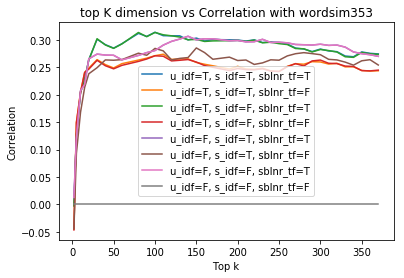

In [56]:
import matplotlib.pyplot as plt
plt.plot(topcol,npvalttt[0:38],label="u_idf=T, s_idf=T, sblnr_tf=T")
plt.plot(topcol,npvalttf[0:38],label="u_idf=T, s_idf=T, sblnr_tf=F")
plt.plot(topcol,npvaltft[0:38],label="u_idf=T, s_idf=F, sblnr_tf=T")
plt.plot(topcol,npvaltff[0:38],label="u_idf=T, s_idf=F, sblnr_tf=F")
plt.plot(topcol,npvalftt[0:38],label="u_idf=F, s_idf=T, sblnr_tf=T")
plt.plot(topcol,npvalftf[0:38],label="u_idf=F, s_idf=T, sblnr_tf=F")
plt.plot(topcol,npvalfft[0:38],label="u_idf=F, s_idf=F, sblnr_tf=T")
plt.plot(topcol,npvalfff[0:38],label="u_idf=F, s_idf=F, sblnr_tf=F")

plt.ylabel('Correlation')
plt.xlabel('Top k')
plt.title("top K dimension vs Correlation with wordsim353")
#plt.xticks(topcol)
plt.legend()
plt.savefig("/home/sp/ap.png")
plt.show()

In [18]:
stemmer.stem("cricket")

'cricket'

In [30]:
npvalttt = np.zeros(ll)
npvalttf = np.zeros(ll)
npvaltft = np.zeros(ll)
npvaltff = np.zeros(ll)
npvalftt = np.zeros(ll)
npvalftf = np.zeros(ll)
npvalfft = np.zeros(ll)
npvalfff = np.zeros(ll)

In [108]:
s = set(w1list + w2list)
ee = [w for w in s if w not in set(vocab)]

In [109]:
ee

['maradona', 'midday', 'seepage', 'tableware', 'carnivore']

In [107]:
vocab.index("seafood")

91778

In [37]:
np.max(npvalfff)

0.2962020725817381